# Source [Kaggle Iris](https://www.kaggle.com/uciml/iris)


In [3]:
! pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.4 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 31.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 65.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# k-fold
np.random.seed(123)

In [5]:
filename = 'iris.csv'
#seaborn.set(style='ticks')
df = pd.read_csv(filename)

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Using all the four values yields very good results

In [9]:
y = df["Species"]

In [10]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [11]:
X = df[["SepalLengthCm", "SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [12]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [14]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
16,5.4,3.9,1.3,0.4
51,6.4,3.2,4.5,1.5
102,7.1,3.0,5.9,2.1
111,6.4,2.7,5.3,1.9
...,...,...,...,...
98,5.1,2.5,3.0,1.1
90,5.5,2.6,4.4,1.2
52,6.9,3.1,4.9,1.5
139,6.9,3.1,5.4,2.1


In [24]:
model = LogisticRegression(max_iter=200).fit(x_train, y_train)

In [25]:
print('train accuracy:', model.score(x_train, y_train))
print('test accuracy:', model.score(x_test, y_test))

train accuracy: 0.9732142857142857
test accuracy: 0.9736842105263158


In [17]:
y_prediction = model.predict(x_test)

In [18]:
y_prediction

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [19]:
print('test classification report:')
print(classification_report(y_test, y_prediction))

test classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.95        38
      macro avg       0.96      0.94      0.95        38
   weighted avg       0.95      0.95      0.95        38



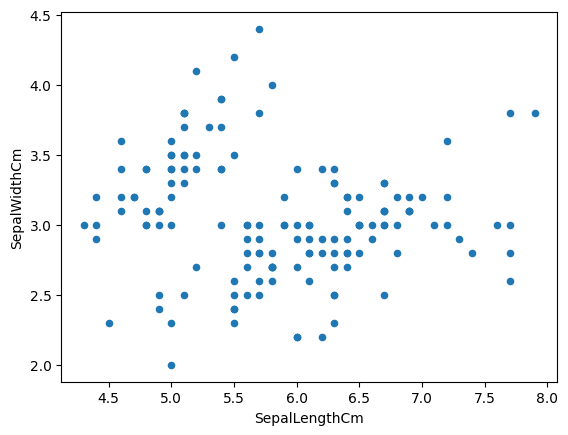

In [20]:
df.plot(x="SepalLengthCm", y="SepalWidthCm", kind="scatter");
# this shows the relation in all the dataset, but this does not help a lot

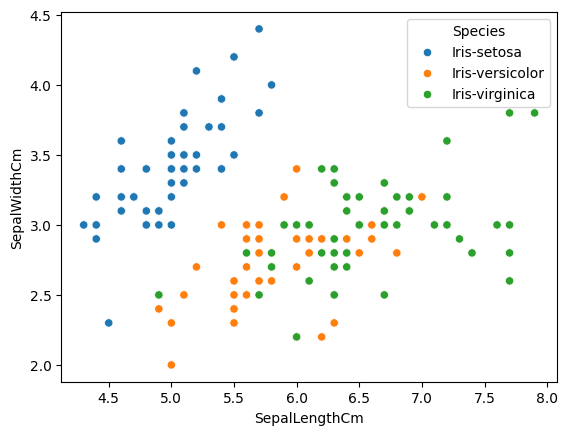

In [21]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df);
# Now we can see the 3 differnt types of iris
# In this plot we can see that the setosa could be relatively easily set aside from the rest (except that outlier at the bottom left)
# We could remove that outlier for better modelling

Set the color manually

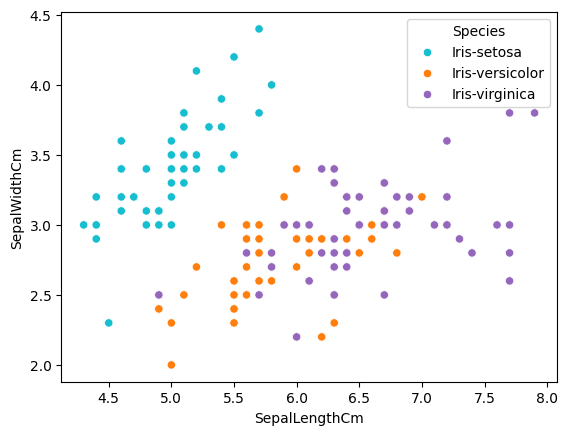

In [26]:
palette = {"Iris-setosa":"tab:cyan",
           "Iris-versicolor":"tab:orange",
           "Iris-virginica":"tab:purple"}
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, palette=palette);

In [27]:
y = df["Species"]
X = df[["SepalLengthCm", "SepalWidthCm"]]
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [28]:
model = LogisticRegression().fit(x_train, y_train)

In [29]:
print('train accuracy:', model.score(x_train, y_train))
print('test accuracy:', model.score(x_test, y_test))
y_prediction = model.predict(x_test)
print('test classification report:')
print(classification_report(y_test, y_prediction))
# precision: how many I set setosa was really setosa
# recall: how many of all the setosas were identified as setosas
# This is indeed very good for setosas, but not for the other types

train accuracy: 0.8214285714285714
test accuracy: 0.7894736842105263
test classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.92      0.96        13
Iris-versicolor       0.67      0.77      0.71        13
 Iris-virginica       0.73      0.67      0.70        12

       accuracy                           0.79        38
      macro avg       0.80      0.79      0.79        38
   weighted avg       0.80      0.79      0.79        38



In [ ]:
# TODO: scale features = normalize features

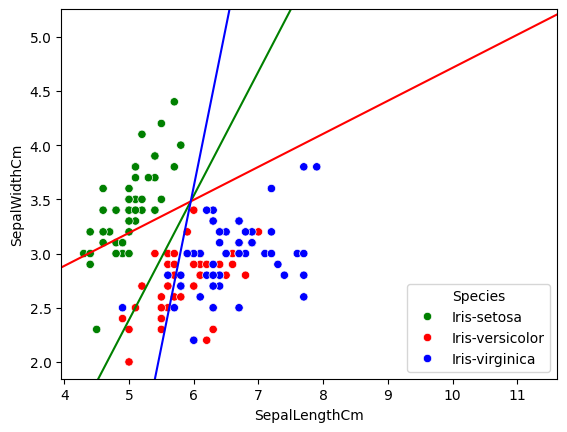

In [30]:
g =sns.scatterplot(x="SepalLengthCm",
                   y="SepalWidthCm",
                   hue="Species",
                   data=df,
                   palette=['green','red','blue']);

x1 = - (model.intercept_[0] + model.coef_[0][1]*df.iloc[0,1])/model.coef_[0][0]
x2 = - (model.intercept_[0] + model.coef_[0][1]*df.iloc[4,1])/model.coef_[0][0]
plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "green")

x1 = - (model.intercept_[1] + model.coef_[1][1]*df.iloc[0,1])/model.coef_[1][0]
x2 = - (model.intercept_[1] + model.coef_[1][1]*df.iloc[4,1])/model.coef_[1][0]
plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "red")


x1 = - (model.intercept_[2] + model.coef_[2][1]*df.iloc[0,1])/model.coef_[2][0]
x2 = - (model.intercept_[2] + model.coef_[2][1]*df.iloc[4,1])/model.coef_[2][0]
plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "blue");

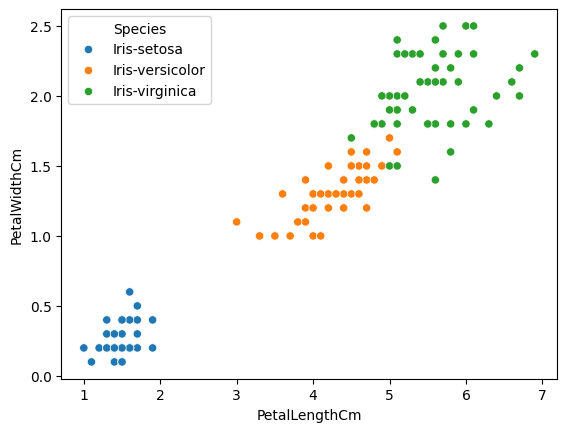

In [31]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df);

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1_000))
])

# standard_scaler = StandardScaler()
# x_train = standard_scaler.fit_transform(x_train)
# x_test = standard_scaler.transform(x_test)

# model = LogisticRegression()
# model.fit(x_train, y_train)

In [33]:
y = df["Species"]
X = df[["SepalLengthCm", "SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

# model = LogisticRegression(C=1, solver="saga", penalty="l2", max_iter=10_000)
model.fit(x_train, y_train)

print('train accuracy:', model.score(x_train, y_train))
print('test accuracy:', model.score(x_test, y_test))
y_prediction = model.predict(x_test)
print('test classification report:')
print(classification_report(y_test, y_prediction))
# precision: how many I set setosa was really setosa
# recall: how many of all the setosas were identified as setosas

train accuracy: 0.9732142857142857
test accuracy: 0.9736842105263158
test classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
model.coef_